In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer
import scipy.stats as stats

In [2]:
df=pd.read_csv('concrete_data.csv')

In [3]:
df.sample(10)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
876,146.0,230.0,0.0,202.0,3.0,827.0,872.0,28,33.06
801,252.0,0.0,0.0,185.0,0.0,1111.0,784.0,28,19.69
125,531.3,0.0,0.0,141.8,28.2,852.1,893.7,28,56.40
72,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
49,380.0,95.0,0.0,228.0,0.0,932.0,594.0,7,32.82
234,213.8,98.1,24.5,181.7,6.7,1066.0,785.5,3,13.18
14,304.0,76.0,0.0,228.0,0.0,932.0,670.0,28,47.81
903,155.0,0.0,143.0,193.0,9.0,1047.0,697.0,28,12.46
98,475.0,118.8,0.0,181.1,8.9,852.1,781.5,7,55.60
580,290.2,193.5,0.0,185.7,0.0,998.2,704.3,7,21.86


In [4]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [5]:
df.describe() #checking if there is any zero value or negative value present

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


# applying train test split

In [6]:
X=df.drop(columns=['Strength'])
Y=df.iloc[:,:-1]

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [8]:
X_train.sample(10)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
173,318.8,212.5,0.0,155.7,14.3,852.1,880.4,91
152,362.6,189.0,0.0,164.9,11.6,944.7,755.8,56
541,333.0,0.0,0.0,192.0,0.0,931.2,842.6,3
857,132.0,207.0,161.0,179.0,5.0,867.0,736.0,28
604,339.0,0.0,0.0,197.0,0.0,968.0,781.0,365
449,172.4,13.6,172.4,156.8,4.1,1006.3,856.4,56
374,376.0,0.0,0.0,214.6,0.0,1003.5,762.4,3
488,387.0,20.0,94.0,157.0,14.3,938.0,845.0,3
79,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3
724,310.0,0.0,0.0,192.0,0.0,1012.0,830.0,90


In [9]:
X_test.sample(10)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
906,266.0,112.0,87.0,178.0,10.0,910.0,745.0,28
453,190.3,0.0,125.2,166.6,9.9,1079.0,798.9,56
192,233.8,0.0,94.6,197.9,4.6,947.0,852.2,56
305,277.1,0.0,97.4,160.6,11.8,973.9,875.6,14
377,376.0,0.0,0.0,214.6,0.0,1003.5,762.4,56
844,298.0,137.0,107.0,201.0,6.0,878.0,655.0,28
853,318.0,0.0,126.0,210.0,6.0,861.0,737.0,28
424,173.5,50.1,173.5,164.8,6.5,1006.2,793.5,14
615,277.0,0.0,0.0,191.0,0.0,968.0,856.0,180
621,307.0,0.0,0.0,193.0,0.0,968.0,812.0,180


# applying regression model without applying transformation

In [10]:
lr=LinearRegression()
model=lr.fit(X_train,y_train)
y_pred=model.predict(X_test)
r2_score(y_test,y_pred)*100

100.0

In [11]:
# cross validation
np.mean(cross_val_score(lr,X,Y,scoring='r2'))*100

95.0

# plotting graph to check distribution

C:\Users\zuhai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


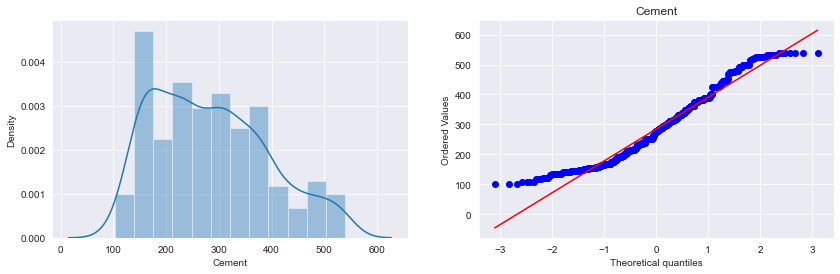

C:\Users\zuhai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


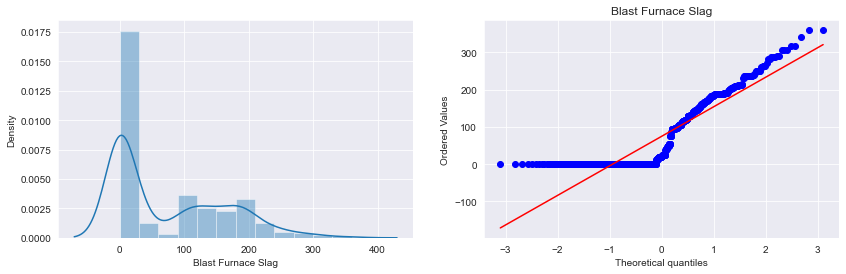

C:\Users\zuhai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


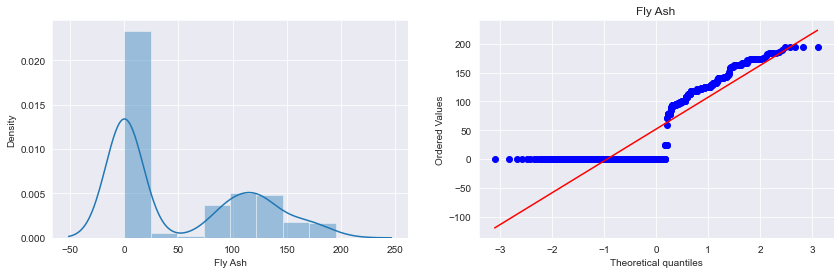

C:\Users\zuhai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


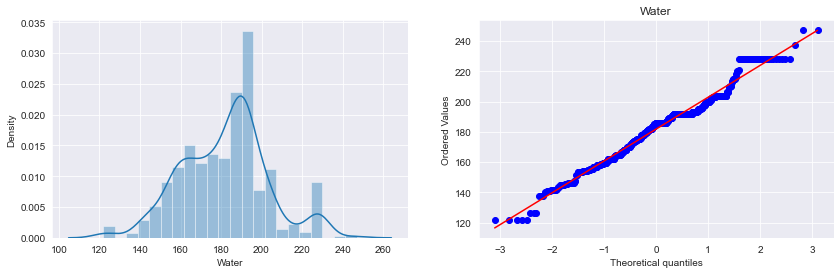

C:\Users\zuhai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


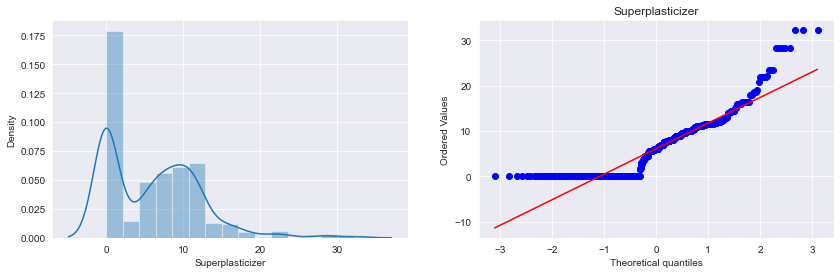

C:\Users\zuhai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


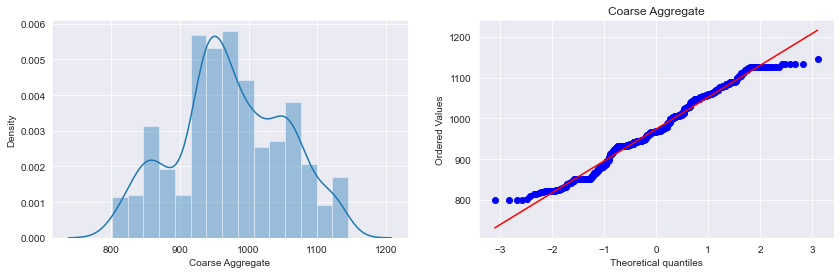

C:\Users\zuhai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


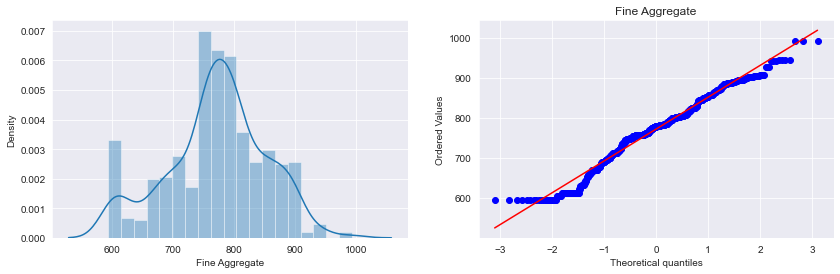

C:\Users\zuhai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


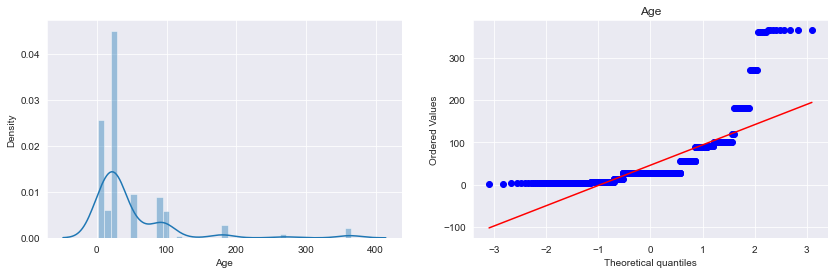

In [12]:
for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    
    plt.subplot(122)
    stats.probplot(X_train[col],dist="norm",plot=plt)
    plt.title(col)
    
    plt.show()

# Applying Box-Cox transform

In [24]:
pt=PowerTransformer(method='box-cox') # by default method is yeo johnson
X_train_transformed=pt.fit_transform(X_train+0.00001) # we add 0.00001 because box-cox dows not apply
# on 0 or negative values so our data has 0 values that's why we add 0.00001
X_test_transformed=pt.transform(X_test+0.00001)
pd.DataFrame({'cols':X_train.columns,'box-cox-lambdas':pt.lambdas_})

,cols,box-cox-lambdas
0,Cement,0.193476
1,Blast Furnace Slag,0.028555
2,Fly Ash,-0.051496
3,Water,0.853461
4,Superplasticizer,0.107216
5,Coarse Aggregate,1.040260
6,Fine Aggregate,1.890557
7,Age,0.071532


In [25]:
X_train_transformed

array([[-0.79294118, -1.08717463,  1.13791169, ...,  0.4142525 ,
         1.7791873 ,  0.07028264],
       [ 0.50467924, -1.08717463, -0.87077687, ...,  1.13754686,
         0.09763807, -1.06749537],
       [ 0.45353565,  1.01426086, -0.87077687, ..., -1.5489629 ,
         1.41239577, -1.7093428 ],
       ...,
       [-0.84788833, -1.08717463,  1.15538009, ...,  1.34229665,
         0.30288539,  1.21922253],
       [ 1.55218633,  0.92374449, -0.87077687, ..., -1.5489629 ,
         0.07846487,  0.07028264],
       [ 0.41338676, -1.08717463,  1.14725496, ..., -0.6230693 ,
         0.09763807,  0.07028264]])

In [14]:
lr1=LinearRegression()
model1=lr.fit(X_train_transformed,y_train)
y_pred1=model.predict(X_test_transformed)
r2_score(y_test,y_pred1)*100

90.8443835478927

In [15]:
#cross-val
pt=PowerTransformer(method='box-cox')
X_transformed=pt.fit_transform(X+0.00001)
np.mean(cross_val_score(lr,X,Y,scoring='r2'))*100

95.0

C:\Users\zuhai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zuhai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


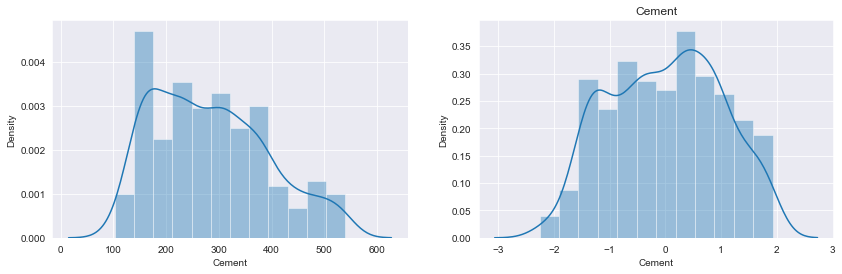

C:\Users\zuhai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zuhai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


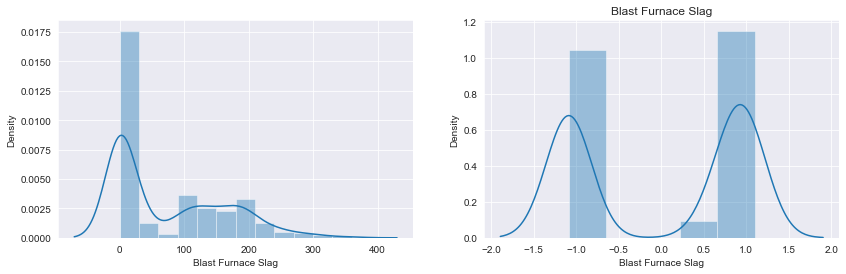

C:\Users\zuhai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zuhai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


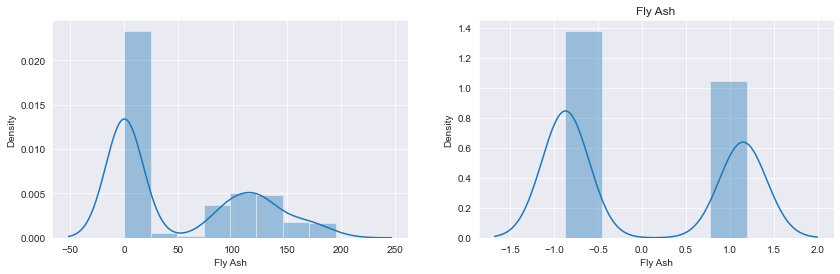

C:\Users\zuhai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zuhai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


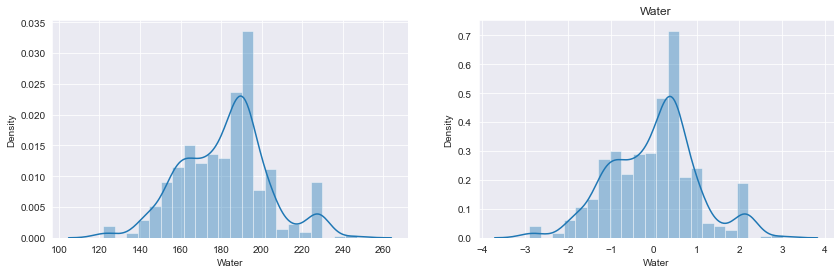

C:\Users\zuhai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zuhai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


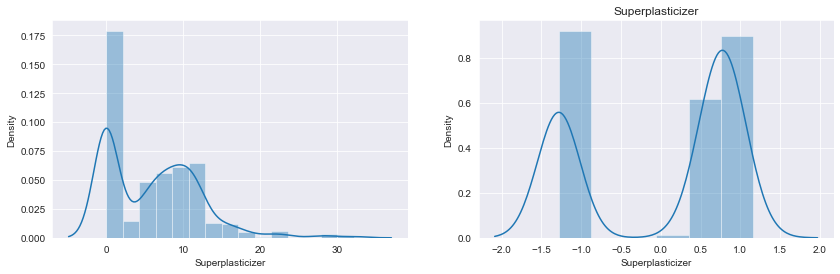

C:\Users\zuhai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zuhai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


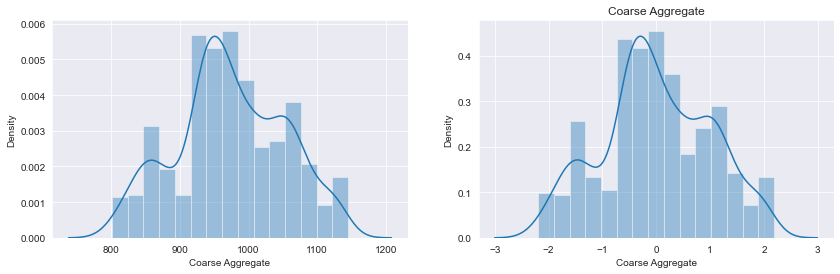

C:\Users\zuhai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zuhai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


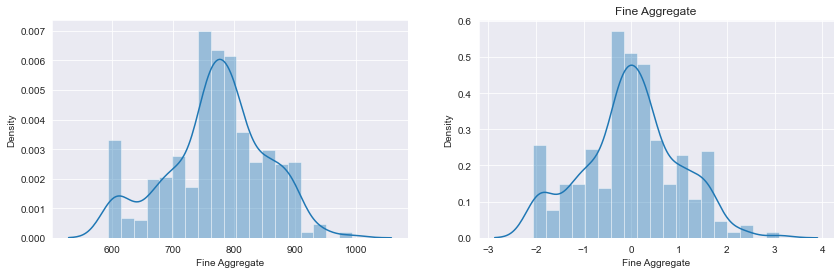

C:\Users\zuhai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zuhai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


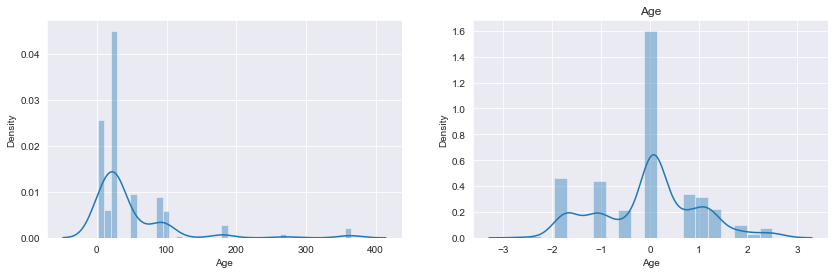

In [16]:
X_train_transformed=pd.DataFrame(X_train_transformed).rename(columns={0:'Cement',1:'Blast Furnace Slag',2:'Fly Ash'
                                                                      ,3:'Water'
                                                                      ,4:'Superplasticizer'
                                                                      ,5:'Coarse Aggregate'
                                                                     ,6:'Fine Aggregate'
                                                                     ,7:'Age'})
for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    
    plt.subplot(122)
    sns.distplot(X_train_transformed[col])
    plt.title(col)
    
    plt.show()

# Applying yeo-johnson

In [17]:
pt=PowerTransformer()
X_train_transformed_2=pt.fit_transform(X_train) 
X_test_transformed_2=pt.transform(X_test)
pd.DataFrame({'cols':X_train.columns,'yeo_johnson':pt.lambdas_})

,cols,yeo_johnson
0,Cement,0.190881
1,Blast Furnace Slag,0.015328
2,Fly Ash,-0.183831
3,Water,0.852513
4,Superplasticizer,0.226618
5,Coarse Aggregate,1.040395
6,Fine Aggregate,1.891786
7,Age,0.025134


In [18]:
linr=LinearRegression()
model1=lr.fit(X_train_transformed_2,y_train)
y_pred_yeo=model1.predict(X_test_transformed_2)
r2_score(y_test,y_pred_yeo)*100

92.63772518188311

In [19]:
#cross-val
powt=PowerTransformer()
X_transformed=pt.fit_transform(X)
np.mean(cross_val_score(lr,X,Y,scoring='r2'))*100

95.0

C:\Users\zuhai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zuhai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


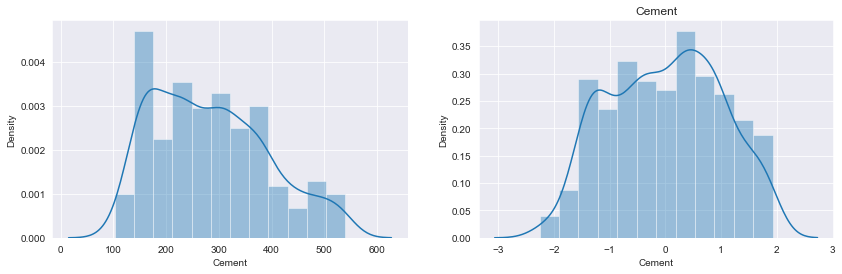

C:\Users\zuhai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zuhai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


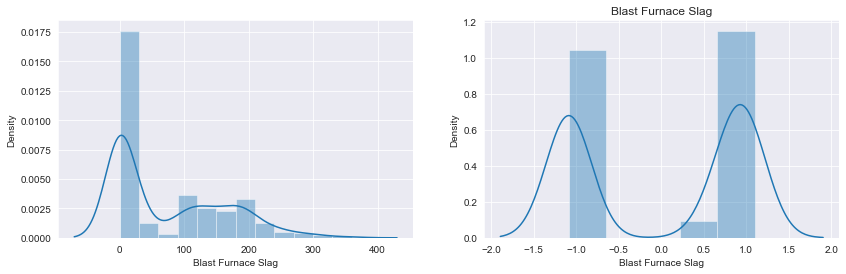

C:\Users\zuhai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zuhai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


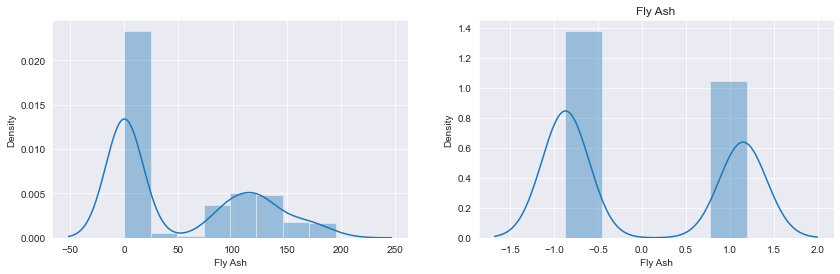

C:\Users\zuhai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zuhai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


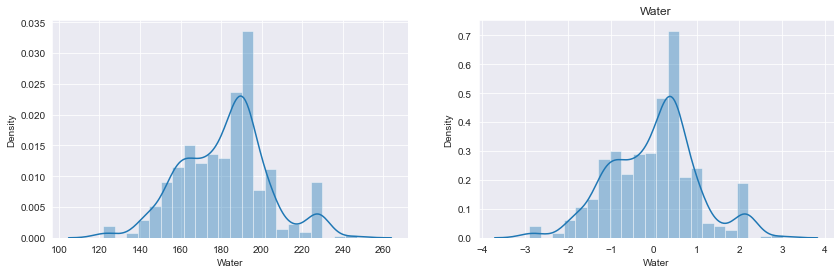

C:\Users\zuhai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zuhai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


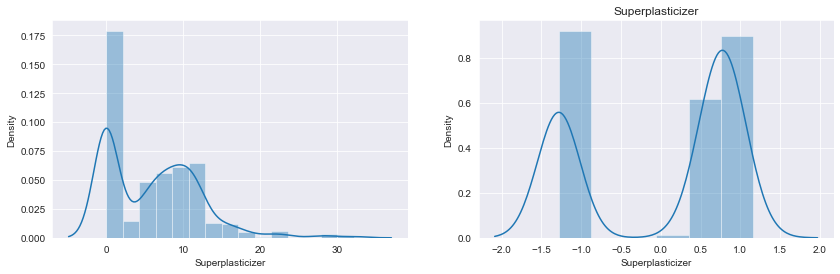

C:\Users\zuhai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zuhai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


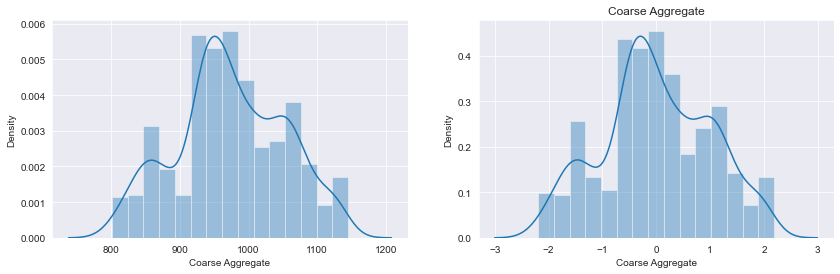

C:\Users\zuhai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zuhai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


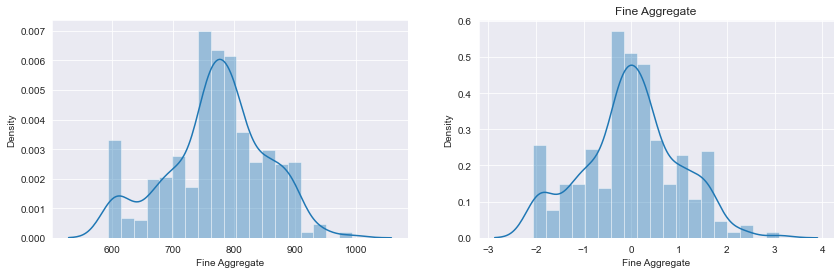

C:\Users\zuhai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zuhai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


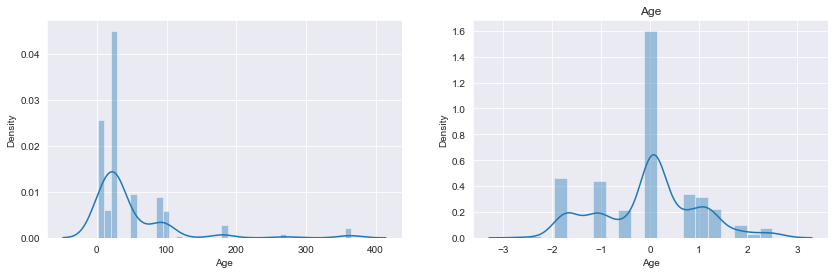

In [20]:
X_train_transformed_2=pd.DataFrame(X_train_transformed_2).rename(columns={0:'Cement',1:'Blast Furnace Slag',2:'Fly Ash'
    ,3:'Water'
    ,4:'Superplasticizer'
    ,5:'Coarse Aggregate'
    ,6:'Fine Aggregate'
    ,7:'Age'})
for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])

    plt.subplot(122)
    sns.distplot(X_train_transformed[col])
    plt.title(col)

    plt.show()